<a href="https://colab.research.google.com/github/25041032-Jocelyn/PROBABILIDAD-Y-ESTADISTICA/blob/main/Practica_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilidad y Estadistica
## Unidad 1
### Facilitador: José Gabriel Rodriguez Rivas
### Alumno: Jocelyn García Castañeda
### **Practica 5: Dataset Autos**

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import *
import math

In [31]:
autos = pd.read_csv("autos2.csv", encoding = "ISO-8859-1")

In [32]:
autos ['price'] = pd.to_numeric(autos['price'], errors='coerce')
df_clean = autos.dropna(subset=['price'])
precios = df_clean['price'].tolist()

In [33]:
maximo = max(precios)
minimo = min(precios)
moda = mode(precios)
mediana = median(precios)
media = median(precios)
desv = stdev(precios)

In [34]:
print("Estadistica descriptiva de la Fabrica 2\n", "Minimo =", minimo,
      "\n Máximo =", maximo, "\n Moda =", moda, "\n Media =", media,
      "\n Mediana =", mediana)
print("Desviación estándar:", desv)
print(df_clean['price'].describe())

Estadistica descriptiva de la Fabrica 2
 Minimo = 5118.0 
 Máximo = 45400.0 
 Moda = 16500.0 
 Media = 10295.0 
 Mediana = 10295.0
Desviación estándar: 7947.066341939274
count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64


Valor de n = 201
Número de intervalos (bins) según Sturges = 8
                  Clase  Frec  Frec Rel  Frec Porc  Frec Ac  Frec Rel Ac  \
0  (5077.717, 10153.25]    98  0.487562  48.756219       98     0.487562   
1   (10153.25, 15188.5]    42  0.208955  20.895522      140     0.696517   
2   (15188.5, 20223.75]    36  0.179104  17.910448      176     0.875622   
3   (20223.75, 25259.0]     8  0.039801   3.980100      184     0.915423   
6   (25259.0, 30294.25]     3  0.014925   1.492537      187     0.930348   
4   (30294.25, 35329.5]     7  0.034826   3.482587      194     0.965174   
5   (35329.5, 40364.75]     4  0.019900   1.990050      198     0.985075   
7   (40364.75, 45400.0]     3  0.014925   1.492537      201     1.000000   

   Frec Porc Ac  
0     48.756219  
1     69.651741  
2     87.562189  
3     91.542289  
6     93.034826  
4     96.517413  
5     98.507463  
7    100.000000  


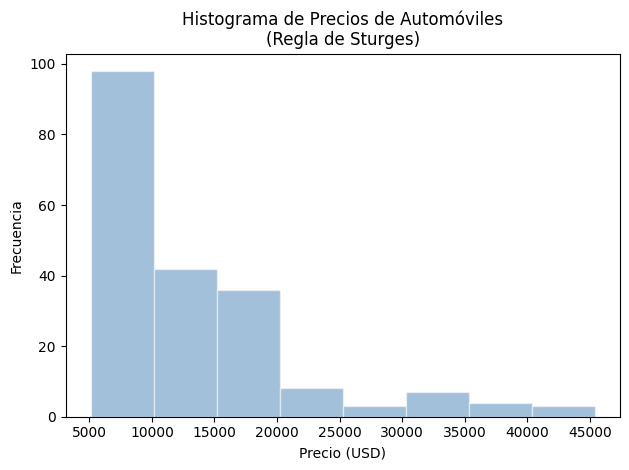

In [35]:
n = len(precios)
K = int(1 + math.log2(n))
print(f"Valor de n = {n}")
print(f"Número de intervalos (bins) según Sturges = {K}")

tabla_frecuencia = pd.cut(df_clean['price'], bins=K, include_lowest=True).value_counts().reset_index()
tabla_frecuencia.columns = ['Clase', 'Frec']
tabla_frecuencia = tabla_frecuencia.sort_values(by='Clase')

tabla_frecuencia['Frec Rel']      = tabla_frecuencia['Frec'] / n
tabla_frecuencia['Frec Porc']     = tabla_frecuencia['Frec'] / n * 100
tabla_frecuencia['Frec Ac']       = tabla_frecuencia['Frec'].cumsum()
tabla_frecuencia['Frec Rel Ac']   = tabla_frecuencia['Frec Rel'].cumsum()
tabla_frecuencia['Frec Porc Ac']  = tabla_frecuencia['Frec Porc'].cumsum()

print(tabla_frecuencia)

plt.hist(df_clean['price'], bins=K, alpha=0.5, color='steelblue', edgecolor='white')
plt.title('Histograma de Precios de Automóviles\n(Regla de Sturges)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

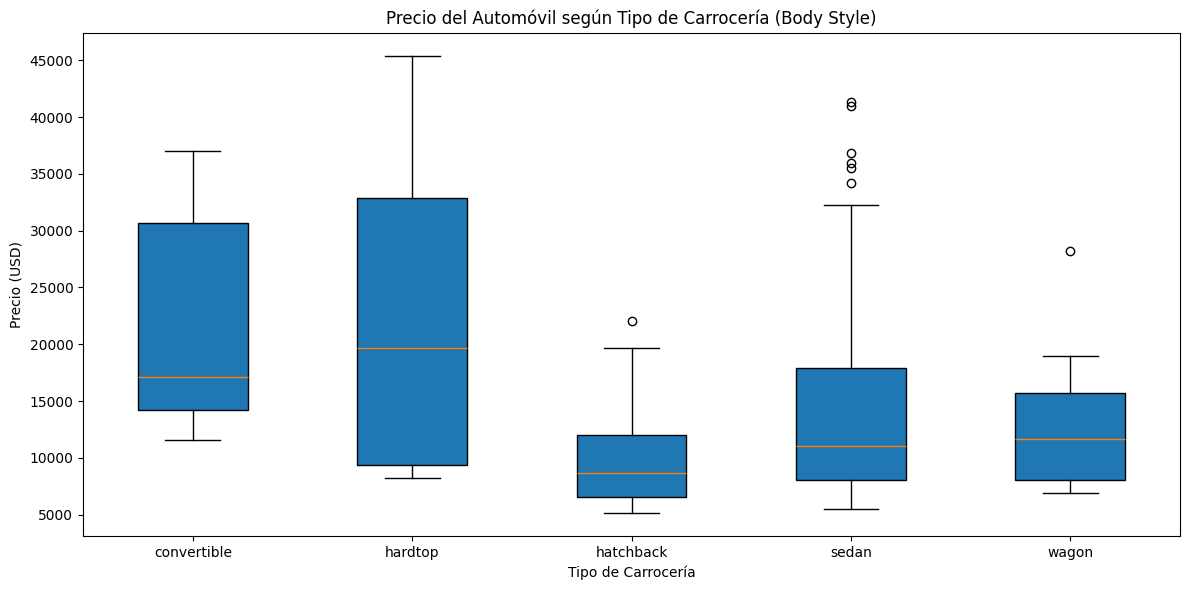

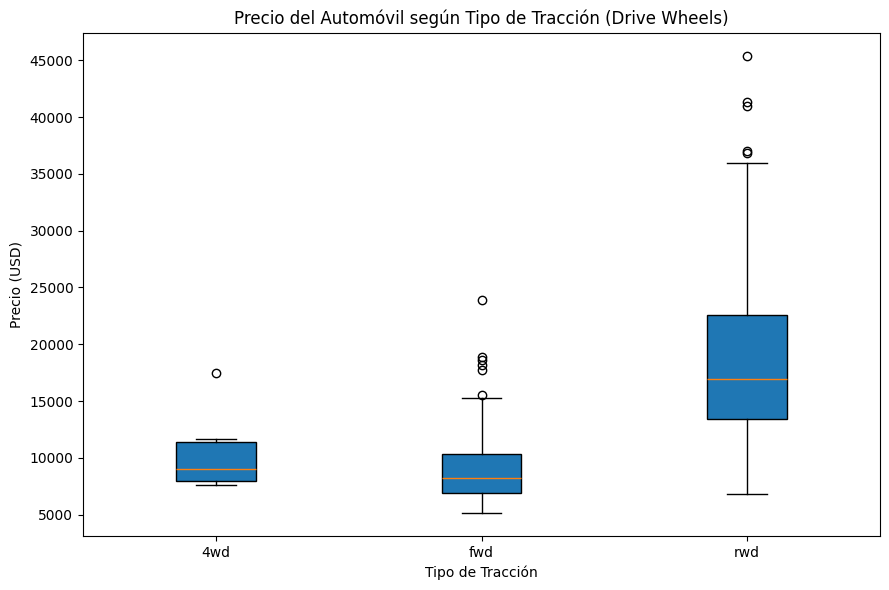

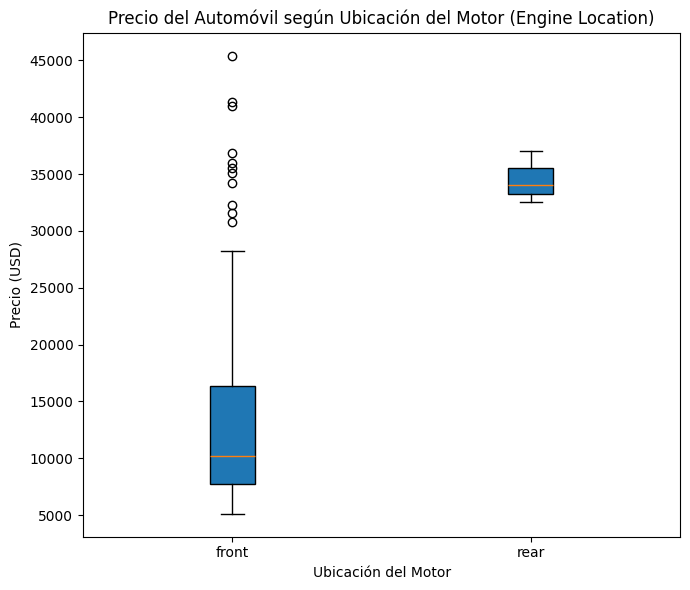

In [36]:
grupos_body = [group['price'].tolist() for name, group in df_clean.groupby('body-style')]
etiquetas_body = [name for name, group in df_clean.groupby('body-style')]

fig, ax = plt.subplots(figsize=(12, 6))
bplot = ax.boxplot(grupos_body, vert=True, patch_artist=True)
ax.set_xticklabels(etiquetas_body)
ax.set_title('Precio del Automóvil según Tipo de Carrocería (Body Style)')
ax.set_xlabel('Tipo de Carrocería')
ax.set_ylabel('Precio (USD)')
plt.tight_layout()
plt.show()


grupos_drive = [group['price'].tolist() for name, group in df_clean.groupby('drive-wheels')]
etiquetas_drive = [name for name, group in df_clean.groupby('drive-wheels')]

fig, ax = plt.subplots(figsize=(9, 6))
bplot = ax.boxplot(grupos_drive, vert=True, patch_artist=True)
ax.set_xticklabels(etiquetas_drive)
ax.set_title('Precio del Automóvil según Tipo de Tracción (Drive Wheels)')
ax.set_xlabel('Tipo de Tracción')
ax.set_ylabel('Precio (USD)')
plt.tight_layout()
plt.show()

grupos_engine = [group['price'].tolist() for name, group in df_clean.groupby('engine-location')]
etiquetas_engine = [name for name, group in df_clean.groupby('engine-location')]

fig, ax = plt.subplots(figsize=(7, 6))
bplot = ax.boxplot(grupos_engine, vert=True, patch_artist=True)
ax.set_xticklabels(etiquetas_engine)
ax.set_title('Precio del Automóvil según Ubicación del Motor (Engine Location)')
ax.set_xlabel('Ubicación del Motor')
ax.set_ylabel('Precio (USD)')
plt.tight_layout()
plt.show()

##CONCLUSIONES##
La mayoría de los automóviles se concentra en precios bajos, con una distribución sesgada hacia la derecha debido a unos pocos vehículos de lujo con precios muy elevados.

Los hardtop y convertible son los más costosos, mientras que los hatchback son los más económicos. Los sedan son el tipo más común en el dataset.
Drive Wheels — Los autos con tracción trasera (rwd) son considerablemente más caros que los de tracción delantera (fwd) y 4x4 (4wd), asociándose generalmente a vehículos de mayor gama.

Los autos con motor trasero tienen precios mucho más altos que los de motor delantero, aunque representan una minoría dentro del dataset.

}El precio de los automóviles está fuertemente influenciado por características como el tipo de carrocería, la tracción y la ubicación del motor. Los vehículos más costosos corresponden a segmentos deportivos y de lujo, mientras que la mayoría del mercado se concentra en autos de gama económica y media.